In [42]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [43]:
import os, sys
os.getcwd()

'd:\\Kifya\\Week_0\\notebooks'

In [44]:
import sys
sys.path.append('../scripts')

from load_data import load_csv_files

# List of CSV file paths
file_paths = [
    '../data/benin-malanville.csv',
    '../data/sierraleone-bumbuna.csv',
    '../data/togo-dapaong_qc.csv'
]

# Load datasets
datasets = load_csv_files(file_paths)

benin-malanville.csv loaded successfully with shape (525600, 19).
sierraleone-bumbuna.csv loaded successfully with shape (525600, 19).
togo-dapaong_qc.csv loaded successfully with shape (525600, 19).


In [45]:
# Accessing the first dataset
data = datasets['togo-dapaong_qc.csv']
data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [46]:
data.shape

(525600, 19)

In [47]:
# Check the type and columns
print(type(data)) # Should be DataFrame
#print(data.columns) # List all columns

<class 'pandas.core.frame.DataFrame'>


In [48]:
print(data.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


In [49]:
data.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [50]:
type(data)

pandas.core.frame.DataFrame

Data Quality Check

In [51]:
# Convert the 'Timestamp' column to datetime format for time series analysis
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Summary Statistics: Calculate mean, median, standard deviation, etc.
summary_stats = data.describe()
summary_stats

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-25 12:00:30.000000768,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
min,2021-10-25 00:01:00,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,2022-01-24 06:00:45,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2022-04-25 12:00:30,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,2022-07-25 18:00:15,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,2022-10-25 00:00:00,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN
std,NaN,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN


In [52]:
# check null value
data.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [54]:
# Check negative value
# Convert relevant columns to numeric types
numeric_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Count of negative values in each column
negative_counts = (data[numeric_columns] < 0).sum()
print("Count of negative values in each column:")
print(negative_counts)

Count of negative values in each column:
GHI       257385
DNI            0
DHI            0
ModA           0
ModB           0
WS             0
WSgust         0
dtype: int64


In [55]:
# Check Outlier 
Q1 = data[['ModA', 'ModB', 'WS', 'WSgust']].quantile(0.25)
Q3 = data[['ModA', 'ModB', 'WS', 'WSgust']].quantile(0.75)
IQR = Q3 - Q1

In [56]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data[['ModA', 'ModB', 'WS', 'WSgust']].quantile(0.25)
Q3 = data[['ModA', 'ModB', 'WS', 'WSgust']].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Identify outliers as data points outside the IQR range
outliers = ((data[['ModA', 'ModB', 'WS', 'WSgust']] < (Q1 - 1.5 * IQR)) | 
            (data[['ModA', 'ModB', 'WS', 'WSgust']] > (Q3 + 1.5 * IQR))).sum()

outliers


ModA      1237
ModB      1537
WS        8708
WSgust    7377
dtype: int64

Time Series Analysis

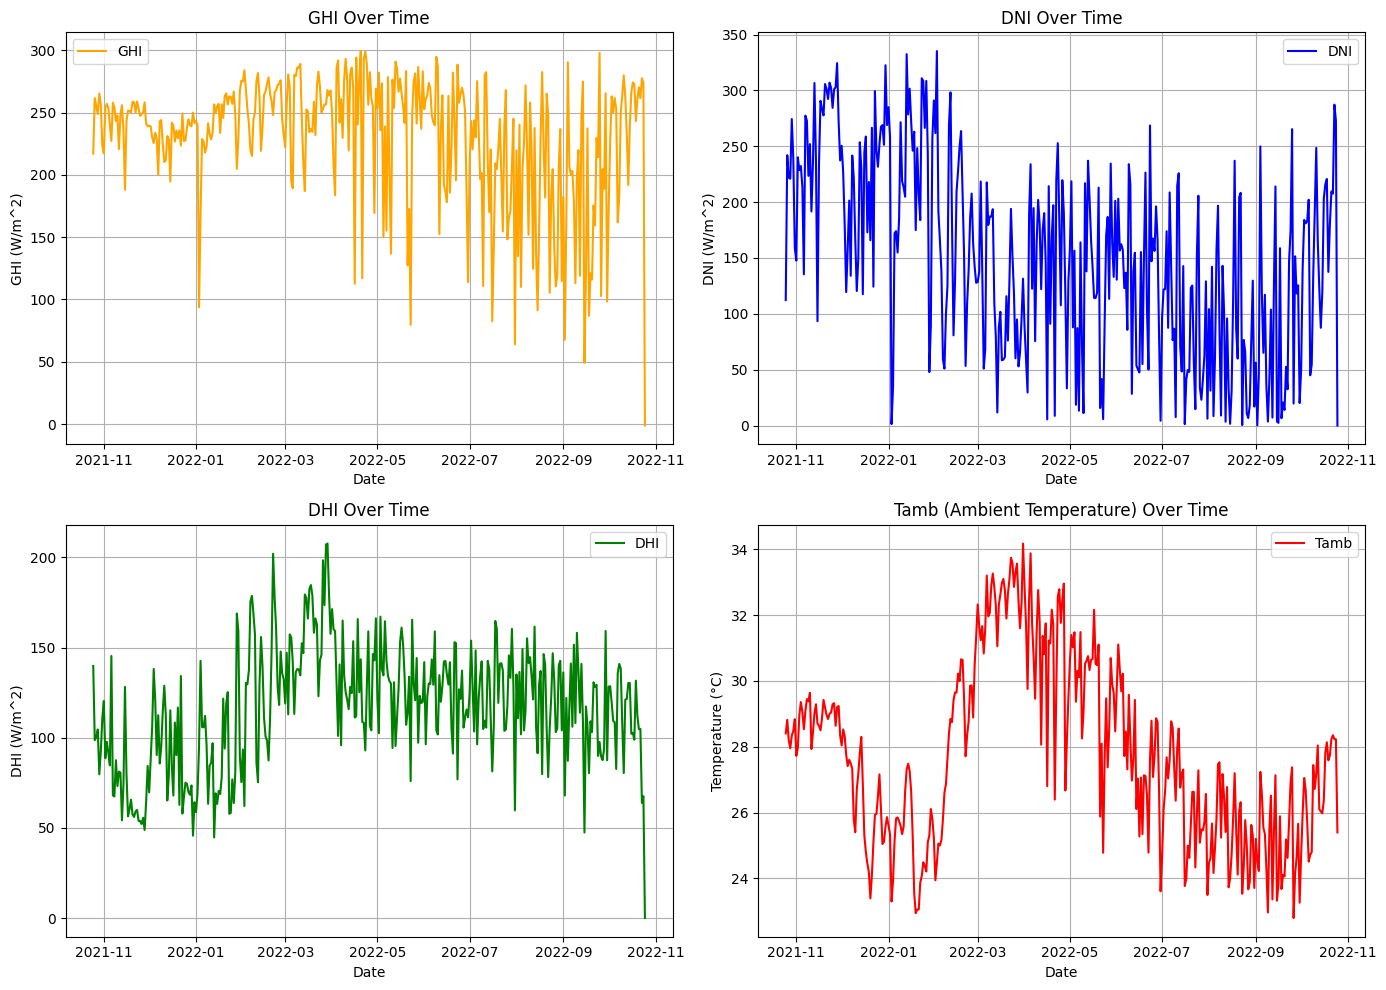

In [15]:
import matplotlib.pyplot as plt

# Set the 'Timestamp' column as the index for easier time series plotting
data.set_index('Timestamp', inplace=True)

# Resample data to daily mean for clearer visualization of trends
daily_data = data[['GHI', 'DNI', 'DHI', 'Tamb']].resample('D').mean()

# Plot line graphs for GHI, DNI, DHI, and Tamb over time
plt.figure(figsize=(14, 10))

# Plot GHI
plt.subplot(2, 2, 1)
plt.plot(daily_data.index, daily_data['GHI'], color='orange', label='GHI')
plt.title('GHI Over Time')
plt.xlabel('Date')
plt.ylabel('GHI (W/m^2)')
plt.legend()
plt.grid(True)

# Plot DNI
plt.subplot(2, 2, 2)
plt.plot(daily_data.index, daily_data['DNI'], color='blue', label='DNI')
plt.title('DNI Over Time')
plt.xlabel('Date')
plt.ylabel('DNI (W/m^2)')
plt.legend()
plt.grid(True)

# Plot DHI
plt.subplot(2, 2, 3)
plt.plot(daily_data.index, daily_data['DHI'], color='green', label='DHI')
plt.title('DHI Over Time')
plt.xlabel('Date')
plt.ylabel('DHI (W/m^2)')
plt.legend()
plt.grid(True)

# Plot Tamb
plt.subplot(2, 2, 4)
plt.plot(daily_data.index, daily_data['Tamb'], color='red', label='Tamb')
plt.title('Tamb (Ambient Temperature) Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


Correlation Analysis

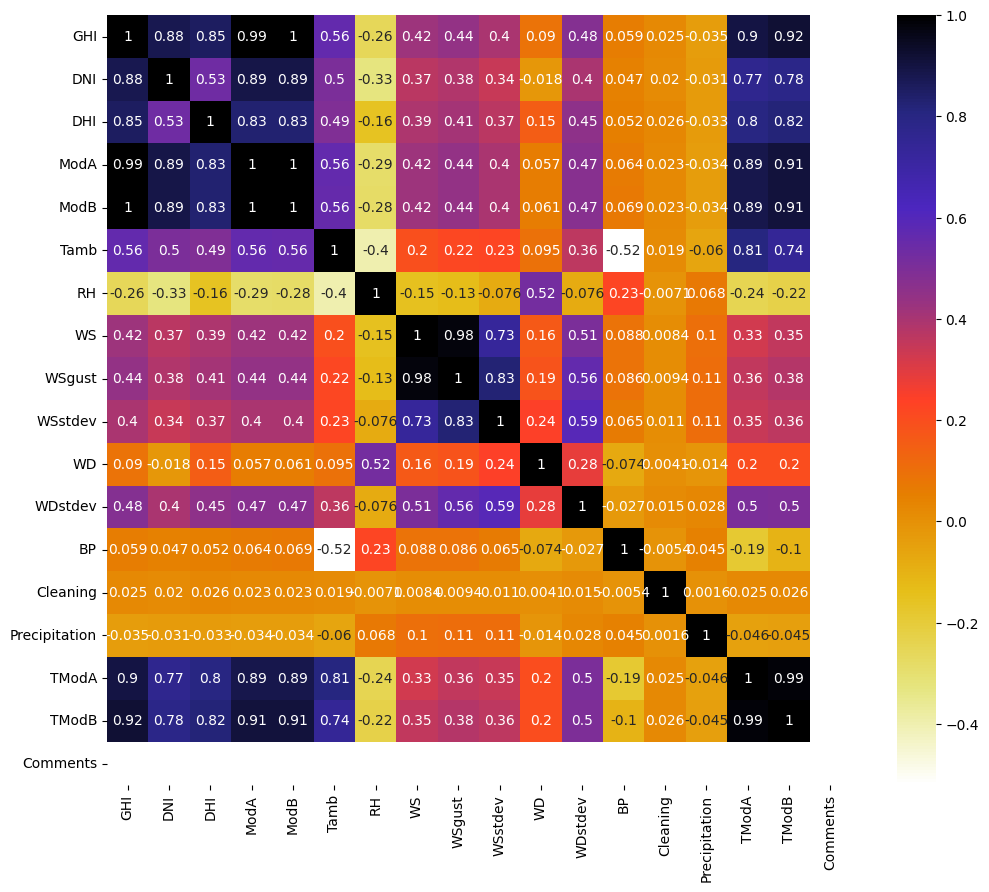

In [16]:
plt.figure(figsize=(12,10))
cor=data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

Wind Analysis

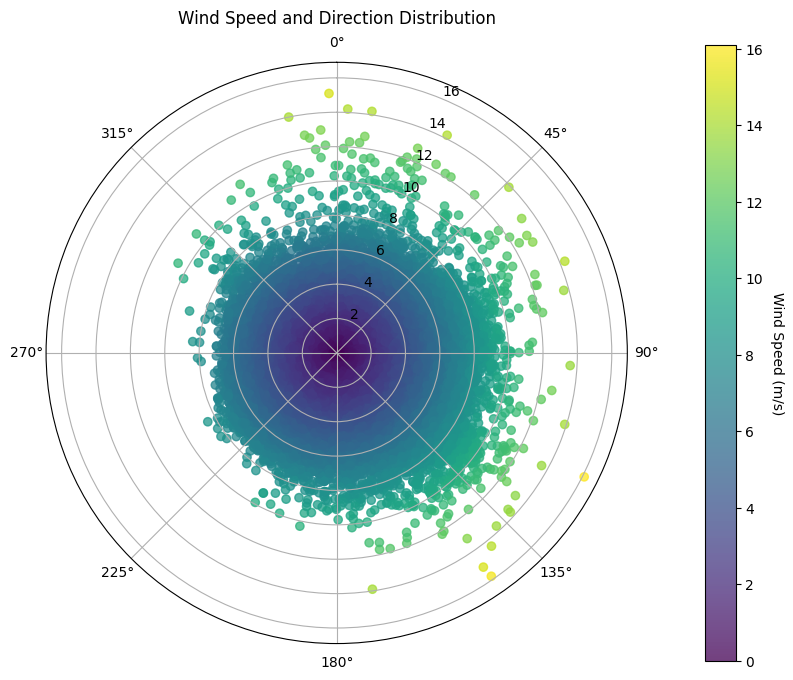

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare wind data
wind_speed = data['WS']
wind_direction = data['WD']

# Convert wind direction from degrees to radians for the polar plot
wind_direction_radians = np.deg2rad(wind_direction)

# Create the polar plot
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='polar')
sc = ax.scatter(wind_direction_radians, wind_speed, c=wind_speed, cmap='viridis', alpha=0.75)

# Add a color bar for wind speed
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Wind Speed (m/s)', rotation=270, labelpad=15)

# Set the title and labels
ax.set_title('Wind Speed and Direction Distribution', va='bottom')
ax.set_theta_zero_location('N')  # Set 0 degrees (North) at the top
ax.set_theta_direction(-1)  # Set the direction of increasing degrees to clockwise

# Display the plot
plt.show()


In [18]:
# Correlation matrix for RH, temperature, and solar radiation
correlation_matrix = data[['RH', 'Tamb', 'TModA', 'TModB', 'GHI', 'DNI', 'DHI']].corr()
print(correlation_matrix)


             RH      Tamb     TModA     TModB       GHI       DNI       DHI
RH     1.000000 -0.400410 -0.244825 -0.224668 -0.258077 -0.327887 -0.155016
Tamb  -0.400410  1.000000  0.805580  0.740832  0.562533  0.504499  0.489758
TModA -0.244825  0.805580  1.000000  0.985069  0.898211  0.765881  0.802319
TModB -0.224668  0.740832  0.985069  1.000000  0.919220  0.783572  0.820360
GHI   -0.258077  0.562533  0.898211  0.919220  1.000000  0.877293  0.852080
DNI   -0.327887  0.504499  0.765881  0.783572  0.877293  1.000000  0.532717
DHI   -0.155016  0.489758  0.802319  0.820360  0.852080  0.532717  1.000000


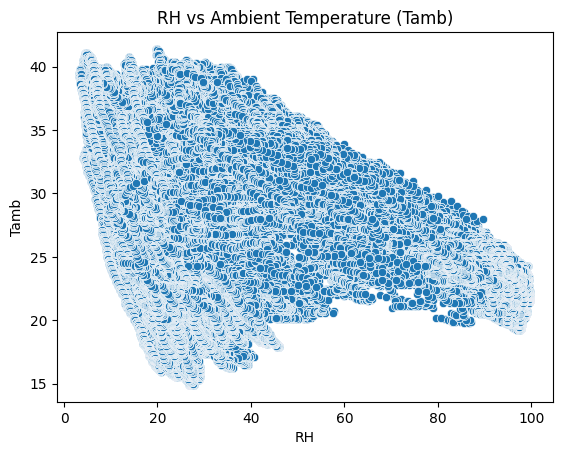

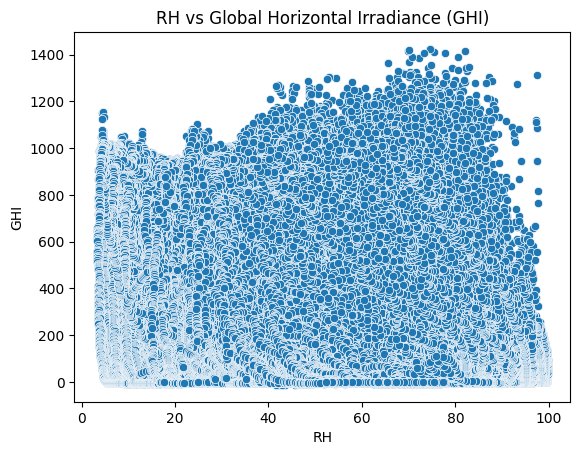

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: RH vs Tamb
sns.scatterplot(x='RH', y='Tamb', data=data)
plt.title('RH vs Ambient Temperature (Tamb)')
plt.show()

# Scatter plot: RH vs GHI
sns.scatterplot(x='RH', y='GHI', data=data)
plt.title('RH vs Global Horizontal Irradiance (GHI)')
plt.show()


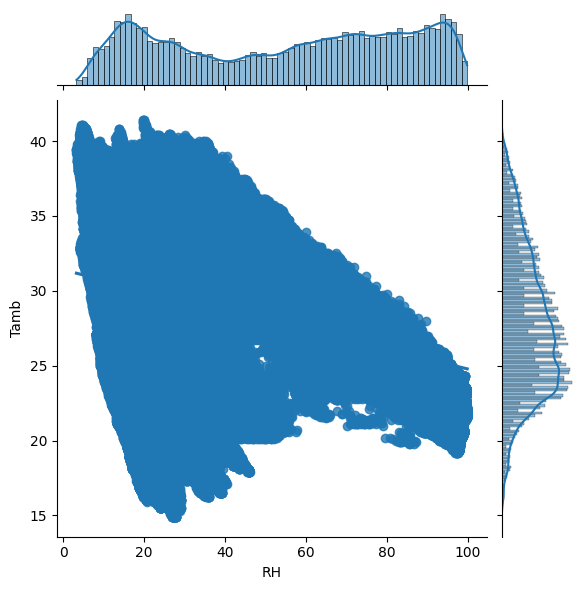

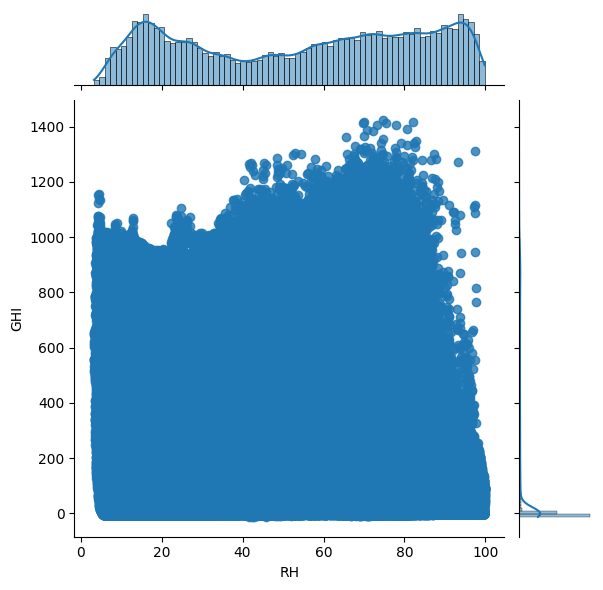

In [20]:
# Joint plot: RH vs Tamb
sns.jointplot(x='RH', y='Tamb', data=data, kind='reg')
plt.show()

# Joint plot: RH vs GHI
sns.jointplot(x='RH', y='GHI', data=data, kind='reg')
plt.show()


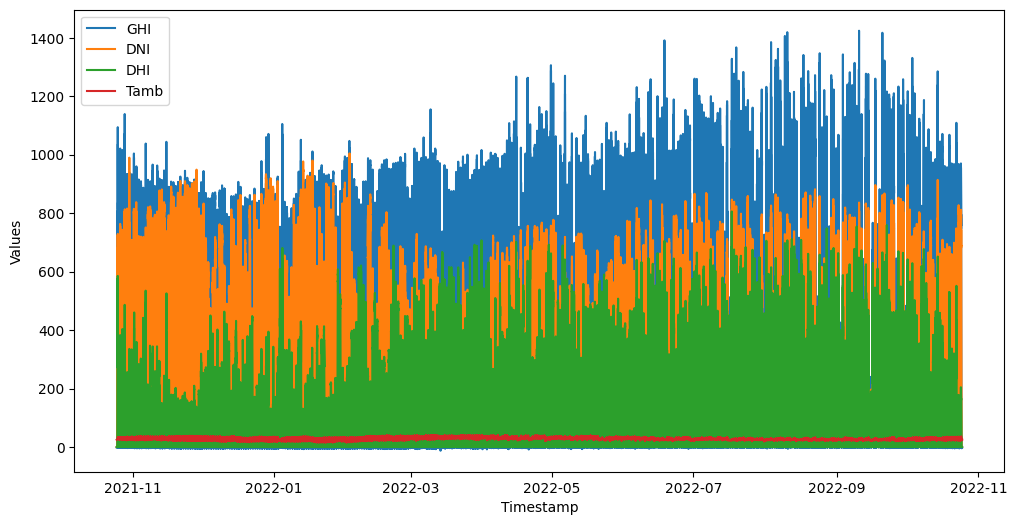

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(data['GHI'], label='GHI')
plt.plot(data['DNI'], label='DNI')
plt.plot(data['DHI'], label='DHI')
plt.plot(data['Tamb'], label='Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.show()

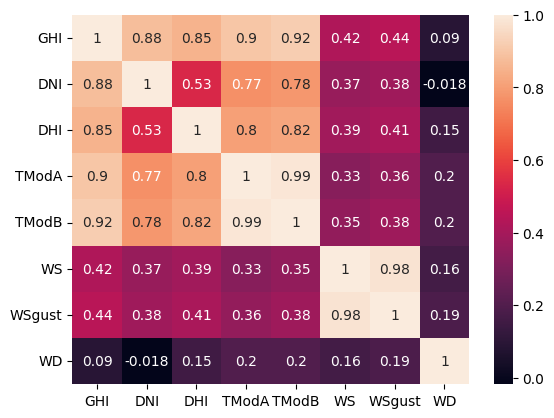

In [23]:
# Correlation Analysis
correlation = data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']].corr()
sns.heatmap(correlation, annot=True)
plt.show()

In [24]:
correlation

,GHI,DNI,DHI,TModA,TModB,WS,WSgust,WD
GHI,1.000000,0.877293,0.852080,0.898211,0.919220,0.421698,0.443923,0.089896
DNI,0.877293,1.000000,0.532717,0.765881,0.783572,0.366667,0.384870,-0.017950
DHI,0.852080,0.532717,1.000000,0.802319,0.820360,0.390597,0.410531,0.154095
TModA,0.898211,0.765881,0.802319,1.000000,0.985069,0.328273,0.357374,0.199702
TModB,0.919220,0.783572,0.820360,0.985069,1.000000,0.353334,0.380626,0.198834
WS,0.421698,0.366667,0.390597,0.328273,0.353334,1.000000,0.977587,0.164655
WSgust,0.443923,0.384870,0.410531,0.357374,0.380626,0.977587,1.000000,0.185546
WD,0.089896,-0.017950,0.154095,0.199702,0.198834,0.164655,0.185546,1.000000


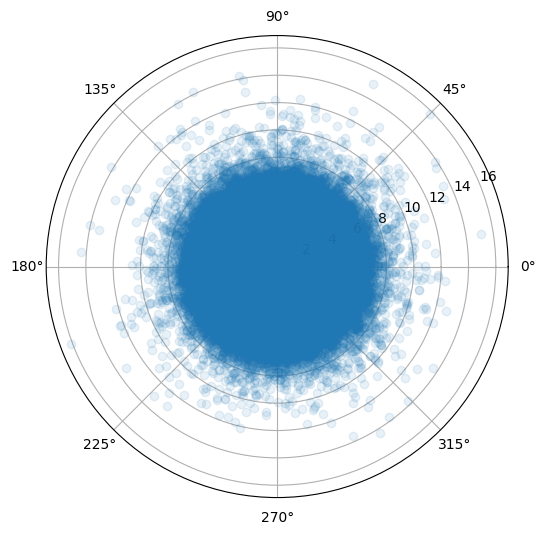

In [25]:
# Wind Analysis
plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)
plt.plot(data['WD'], data['WS'], 'o', alpha=0.1)
plt.show()

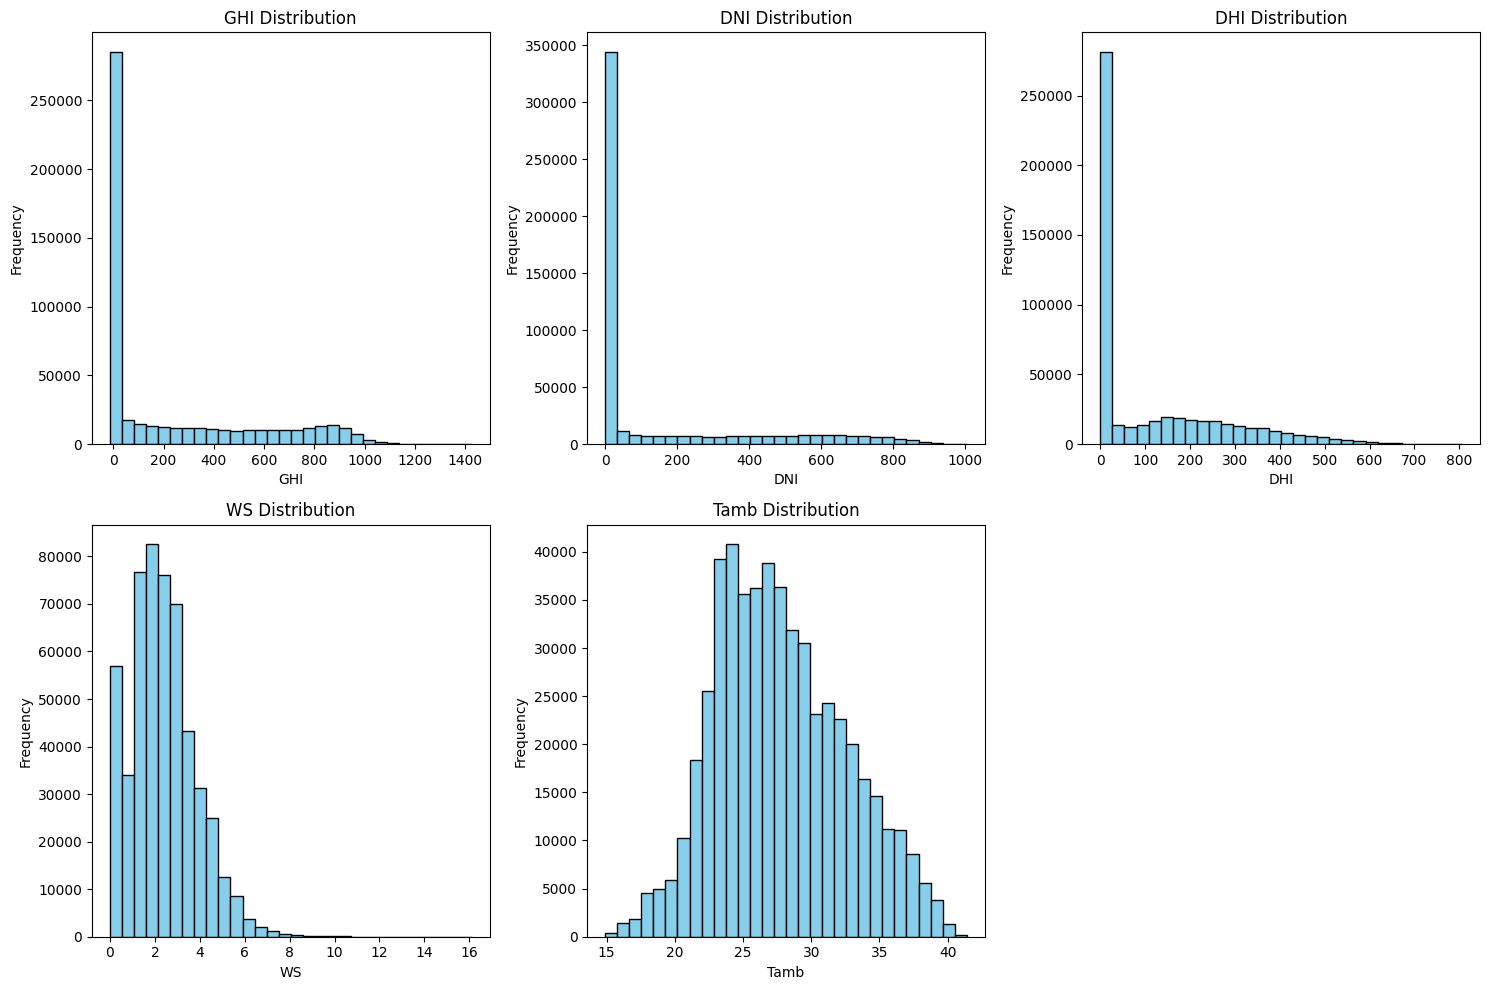

In [26]:
import matplotlib.pyplot as plt

# Define the list of variables to plot
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']

# Set up the figure and axes
plt.figure(figsize=(15, 10))

# Loop through each variable and create a histogram
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    plt.hist(data[var], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{var} Distribution')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Z-Score

In [57]:
from scipy import stats
import numpy as np

# List of variables to calculate Z-scores for
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']

# Calculate Z-scores
z_scores = np.abs(stats.zscore(data[variables]))

# Convert to DataFrame for easier handling
z_scores_df = pd.DataFrame(z_scores, columns=variables)

# Flag data points with Z-score > 3 (considered as outliers)
outliers = (z_scores_df <= 3).any(axis=1)

# drop the outliers
data = data[outliers]

# Display the outliers
print(data)


                 Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
0      2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9   
1      2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1   
2      2021-10-25 00:03:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2   
3      2021-10-25 00:04:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2   
4      2021-10-25 00:05:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3   
...                    ...  ...  ...  ...   ...   ...   ...   ...  ...   
525595 2022-10-24 23:56:00 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0   
525596 2022-10-24 23:57:00 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0   
525597 2022-10-24 23:58:00 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0   
525598 2022-10-24 23:59:00 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0   
525599 2022-10-25 00:00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0   

        WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
0          1.1      0.4  227.6 

Bubble charts 

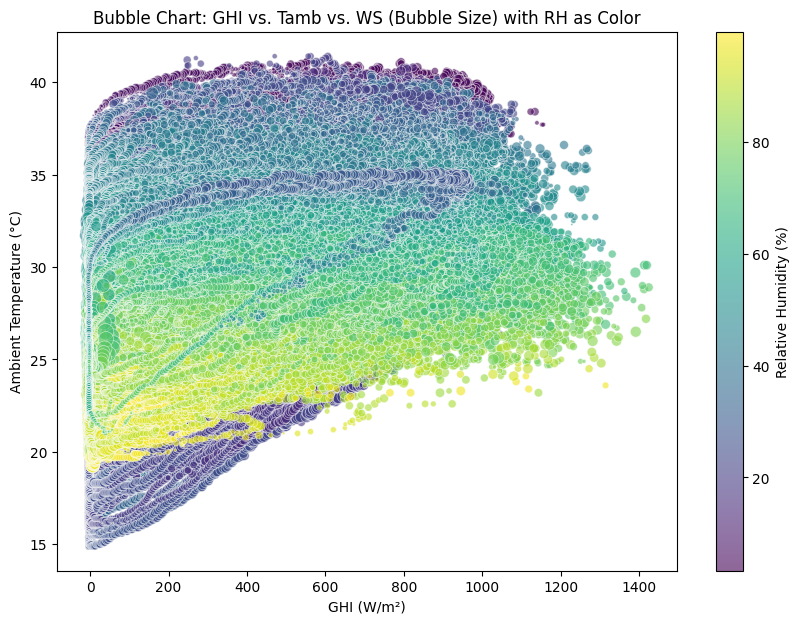

In [31]:
import matplotlib.pyplot as plt

# Define the variables for the bubble chart
x = data['GHI']         # X-axis: GHI
y = data['Tamb']        # Y-axis: Ambient Temperature (Tamb)
bubble_size = data['WS']*10  # Bubble size: Wind Speed (WS), scaled for better visibility
color = data['RH']      # Bubble color: Relative Humidity (RH)

# Create the bubble chart
plt.figure(figsize=(10, 7))
plt.scatter(x, y, s=bubble_size, c=color, cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5)

# Add labels and title
plt.title('Bubble Chart: GHI vs. Tamb vs. WS (Bubble Size) with RH as Color')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.colorbar(label='Relative Humidity (%)')  # Color bar for the RH

plt.show()


Data Cleaning

check null value and handle it

In [62]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [36]:
# Drop the "Comments" column
data_clean = data.drop('Comments', axis=1)
data=data_clean.head()
data

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
Timestamp,,,,,,,,,,,,,,,,,
2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4
2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4
2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4
2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4
2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4


Check for negative values in the dataset and replace with zero

In [68]:
data.shape

(525600, 19)

In [67]:
# Select only numeric columns to check for negative values
numeric_columns = data.select_dtypes(include=[np.number])
# Verify that there are no more negative values
negative_values_after = (numeric_columns < 0).sum()
print("Columns with negative values after replacement:\n", negative_values_after)

Columns with negative values after replacement:
 GHI              257385
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments              0
dtype: int64


In [69]:
# Replace negative values with zero
# data[data < 0] = 0
data['GHI'] = data['GHI'].apply(lambda x: max(x, 0))

In [71]:
# show result
data.shape

(525600, 19)

Handle Outliers

In [72]:
from scipy import stats
import numpy as np
cols_to_check = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'Tamb', 'TModA', 'TModB']
# Calculate Z-scores for selected columns
z_scores = np.abs(stats.zscore(data[cols_to_check]))

# Identify rows with Z-scores > 3 as outliers
outliers = (z_scores > 3).any(axis=1)

# Flag data points with Z-score > 3 (considered as outliers)
non_outliers = (z_scores_df <= 3).any(axis=1)

# drop the outliers
data = data[non_outliers]

In [74]:
print(data.describe())

                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-25 12:00:30.000000768     231.718786     151.258469   
min              2021-10-25 00:01:00       0.000000       0.000000   
25%              2022-01-24 06:00:45       0.000000       0.000000   
50%              2022-04-25 12:00:30       2.100000       0.000000   
75%              2022-07-25 18:00:15     442.400000     246.400000   
max              2022-10-25 00:00:00    1424.000000    1004.500000   
std                              NaN     321.691953     250.956962   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      116.444352     226.144375     219.568588      27.751788   
min         0.000000       0.000000       0.000000      14.900000   
25%         0.000000       0.000000       0.000000      24.200000   
50%         2.500000    